# International Debt Statistics (IDS)

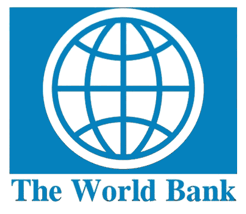

In 1973, the first publication of debt statistics from the World Bank’s Debtor Reporting System (DRS) was published as the World Debt Tables. Since then, the publication and data have undergone numerous iterations to address the challenges and demands posed by the global economic conditions. Below, you can find the links to these annual publications.

In 2013, the publication of debt statistics from the World Bank’s Debtor Reporting System (DRS) changed its name from Global Development Finance to International Debt Statistics. Over the years, the country tables were also streamlined to highlight core debt indicators and ratios, while providing users access to hundreds of debt indicators through the online database.

## Configurar Entorno

In [1]:
# Instalar dependencias necesarias
!pip install requests pandas plotly


In [ ]:
# Importar bibliotecas
import requests
import json
import pandas as pd
import plotly.express as px
import plotly.io as pio

!pip install openpyxl
from google.colab import files


In [ ]:
# Renderizador predeterminado para el entorno de cuaderno
pio.renderers.default = "notebook"


## 1. Bjar Data

### 1.1 Fuentes de datos del Banco Mundial

In [ ]:
# Obtener fuentes de datos del Banco Mundial
sources = requests.get("https://api.worldbank.org/v2/sources?per_page=100&format=json")
sources_json = sources.json()


In [ ]:
# Convertir el JSON a un df
sources_list = sources_json[1]


In [ ]:
# Crear una lista de diccionarios para cada fuente de datos
data_list = []
for source in sources_list:
    data_list.append({
        "id": source["id"],
        "name": source["name"],
        "description": source["description"],
        "url": source["url"]
    })


In [ ]:
# Convertir la lista de diccionarios a un df
df_sources = pd.DataFrame(data_list)
print(df_sources.head())


  id                               name description url
0  1                     Doing Business                
1  2       World Development Indicators                
2  3    Worldwide Governance Indicators                
3  5  Subnational Malnutrition Database                
4  6      International Debt Statistics                


In [ ]:
# Obtener ID de la fuente para International Debt Statistics
for source in sources_json[1]:
    if source["name"] == "International Debt Statistics":
        ids_source_id = source["id"]
        print(f"El ID de la fuente para International Debt Statistics es {ids_source_id}")
        break


El ID de la fuente para International Debt Statistics es 6


In [ ]:
# Obtener indicadores para International Debt Statistics
indicators = requests.get(f"https://api.worldbank.org/v2/sources/{ids_source_id}/indicators?per_page=1000&format=json")
indicators_json = indicators.json()


Buscar Indicador

In [ ]:
# Mostrar los indicadores disponibles
for indicator in indicators_json[1]:  # Mostrar los indicadores
    print(f"{indicator['id']}: {indicator['name']}")


BM.GSR.TOTL.CD: Imports of goods, services and primary income (BoP, current US$)
BN.CAB.XOKA.CD: Current account balance (BoP, current US$)
BX.GRT.EXTA.CD.DT: Grants, excluding technical cooperation (current US$)
BX.GRT.TECH.CD.DT: Technical cooperation grants (current US$)
BX.GSR.TOTL.CD: Exports of goods, services and primary income (BoP, current US$)
BX.KLT.DINV.CD.DT: Foreign direct investment, net inflows in reporting economy (DRS, current US$)
BX.KLT.DREM.CD.DT: Primary income on FDI (current US$)
BX.PEF.TOTL.CD.DT: Portfolio investment, equity (DRS, current US$)
BX.TRF.PWKR.CD.DT: Personal remittances, received (current US$)
DT.AMT.BLAT.CB.CD: CB, bilateral (AMT, current US$)
DT.AMT.BLAT.CD: PPG, bilateral (AMT, current US$)
DT.AMT.BLAT.GG.CD: GG, bilateral (AMT, current US$)
DT.AMT.BLAT.OPS.CD: OPS, bilateral (AMT, current US$)
DT.AMT.BLAT.PRVG.CD: PRVG, bilateral (AMT, current US$)
DT.AMT.BLAT.PS.CD: PS, bilateral (AMT, current US$)
DT.AMT.BLTC.CB.CD: CB, bilateral concessiona

In [ ]:
# Crear una lista de diccionarios con los datos de los indicadores
indicators_list = []
for indicator in indicators_json[1]:
    indicators_list.append({
        'ID': indicator['id'],
        'Name': indicator['name']
    })


In [ ]:
# Convertir la lista a un df
indicators_df = pd.DataFrame(indicators_list)


In [ ]:
# Guardar el df en un archivo de Excel
indicators_df.to_excel('indicators.xlsx', index=False)


In [ ]:
# Descargar archivo Excel
files.download('indicators.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Seleccionar un indicador
indicator_id = "DT.DOD.DLXF.CD"     # "Long-term external debt stock" (Stock de deuda externa a largo plazo)


### 1.2 Obtener datos

In [ ]:
# Descargar datos para el indicador seleccionado
data = requests.get(f"https://api.worldbank.org/v2/country/all/indicator/{indicator_id}?per_page=10000&format=json")
data_json = data.json()

# Convertir los datos a un df
data_list = []
for entry in data_json[1]:
    data_list.append({
        "country": entry["country"]["value"],
        "date": entry["date"],
        "value": entry["value"]
    })

df = pd.DataFrame(data_list)
print(df.head())


                       country  date  value
0  Africa Eastern and Southern  2023    NaN
1  Africa Eastern and Southern  2022    NaN
2  Africa Eastern and Southern  2021    NaN
3  Africa Eastern and Southern  2020    NaN
4  Africa Eastern and Southern  2019    NaN


In [ ]:
# Guardar datos en un archivo Excel
df.to_excel("international_debt_statistics.xlsx", index=False)
print("Datos guardados en 'international_debt_statistics.xlsx'")


Datos guardados en 'international_debt_statistics.xlsx'


In [ ]:
# Descargar archivo de Excel
from google.colab import files
files.download("international_debt_statistics.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 1.3 Obtener Datos de Regiones y Niveles de Ingreso

In [ ]:
# Obtener datos de países y regiones del Banco Mundial
url = "https://api.worldbank.org/v2/country?format=json&per_page=300"
response = requests.get(url)
data = response.json()

# Convertir los datos a un DataFrame de pandas
countries_df = pd.DataFrame(data[1])

# Seleccionar las columnas relevantes
countries_df = countries_df[['id', 'name', 'region', 'incomeLevel']]            # id (código del país), name (nombre del país), region (diccionario con la clave id) e incomeLevel (diccionario con la clave value)
countries_df.columns = ['country_code', 'country', 'region', 'income_level']

# Extraer el valor de la clave 'id' de los diccionarios en la columna 'region'
countries_df['region'] = countries_df['region'].apply(lambda x: x['id'])        # la función apply para extraer el valor de la clave id de los diccionarios en la columna region.
countries_df['income_level'] = countries_df['income_level'].apply(lambda x: x['value'])

# Crear un diccionario de mapeo de siglas a nombres completos
region_mapping = {
    'AFR': 'África',
    'EAS': 'Asia Oriental y Pacífico',
    'ECS': 'Europa y Asia Central',
    'LCN': 'América Latina y el Caribe',
    'MEA': 'Oriente Medio y Norte de África',
    'NAC': 'América del Norte',
    'SAS': 'Asia Meridional',
    'SSF': 'África Subsahariana'
}

# Agregar una columna con el nombre completo de la región
countries_df['region_full'] = countries_df['region'].map(region_mapping)        # el método map para agregar una nueva columna region_full con los nombres completos de las regiones.

# Mostrar las primeras filas del DataFrame
print(countries_df.head())


  country_code                      country region income_level  \
0          ABW                        Aruba    LCN  High income   
1          AFE  Africa Eastern and Southern     NA   Aggregates   
2          AFG                  Afghanistan    SAS   Low income   
3          AFR                       Africa     NA   Aggregates   
4          AFW   Africa Western and Central     NA   Aggregates   

                  region_full  
0  América Latina y el Caribe  
1                         NaN  
2             Asia Meridional  
3                         NaN  
4                         NaN  


In [ ]:
# Guardar el df en un archivo Excel
countries_df.to_excel("countries_and_regions.xlsx", index=False)

# Descargar el archivo Excel
files.download("countries_and_regions.xlsx")
print("Datos guardados en 'countries_and_regions.xlsx'")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Datos guardados en 'countries_and_regions.xlsx'


## 2. Actualizar Data

2.1 Verificar data ultimo anio

In [ ]:
# URL de la API del Banco Mundial
url = "https://api.worldbank.org/v2/sources?per_page=100&format=json"

# Realizar la solicitud a la API
response = requests.get(url)

# Convertir la respuesta a JSON
data = response.json()

# Inspeccionar las primeras entradas del JSON
for entry in data[1][:5]:   # Mostrar las primeras 5 entradas
    print(entry)


{'id': '1', 'lastupdated': '2021-08-18', 'name': 'Doing Business', 'code': 'DBS', 'description': '', 'url': '', 'dataavailability': 'Y', 'metadataavailability': 'Y', 'concepts': '3'}
{'id': '2', 'lastupdated': '2024-12-16', 'name': 'World Development Indicators', 'code': 'WDI', 'description': '', 'url': '', 'dataavailability': 'Y', 'metadataavailability': 'Y', 'concepts': '3'}
{'id': '3', 'lastupdated': '2024-11-05', 'name': 'Worldwide Governance Indicators', 'code': 'WGI', 'description': '', 'url': '', 'dataavailability': 'Y', 'metadataavailability': 'Y', 'concepts': '3'}
{'id': '5', 'lastupdated': '2016-03-21', 'name': 'Subnational Malnutrition Database', 'code': 'SNM', 'description': '', 'url': '', 'dataavailability': 'Y', 'metadataavailability': 'Y', 'concepts': '3'}
{'id': '6', 'lastupdated': '2024-12-03', 'name': 'International Debt Statistics', 'code': 'IDS', 'description': '', 'url': '', 'dataavailability': 'Y', 'metadataavailability': 'Y', 'concepts': '4'}


In [ ]:
# Verificar si hay datos actualizados en 2024
data_available = any("2024" in item['lastupdated'] for item in data[1])

print(f"¿Hay datos del 2024 disponibles?: {data_available}")


¿Hay datos del 2024 disponibles?: True


In [ ]:
# Actualizar Datos al 2024

# URL de la API del Banco Mundial para obtener datos más recientes
url = "https://api.worldbank.org/v2/country/all/indicator/DT.DOD.DLXF.CD?date=2024&format=json&per_page=10000"

# Realizar la solicitud a la API
response = requests.get(url)

# Convertir la respuesta a JSON
data_2024 = response.json()

# Crear una lista de diccionarios con los datos
data_list = []
for item in data_2024[1]:
    data_list.append({
        'country': item['country']['value'],
        'date': item['date'],
        'value': item['value']
    })

# Convertir la lista a un df
df_2024 = pd.DataFrame(data_list)

# Verificar las primeras filas del DataFrame
print(df_2024.head())


In [ ]:
# Guardar df en un archivo de Excel
df_2024.to_excel('world_bank_data_2024.xlsx', index=False)

# Descargar archivo de Excel
files.download('world_bank_data_2024.xlsx')


2.2 Consulta Anio Actual

In [ ]:
from datetime import datetime
# Obtener el año actual
current_year = datetime.now().year


In [ ]:
# Verificar si hay datos disponibles
if len(data) > 1 and data[1] is not None:
    # Verificar si hay datos disponibles para el año actual
    data_available = any(str(current_year) in item['date'] for item in data[1])

    print(f"¿Hay datos del {current_year} disponibles?: {data_available}")

    # Si hay datos disponibles, convertirlos en un DataFrame y exportarlos a Excel
    if data_available:
        # Convertir los datos en un DataFrame
        data_dict = data[1]
        df = pd.DataFrame(data_dict)

        # Exportar el DataFrame a un archivo Excel
        df.to_excel('datos_banco_mundial.xlsx', index=False)
        print("Datos exportados a 'datos_banco_mundial.xlsx'")
    else:
        print(f"No se encontraron datos para el año {current_year}.")
else:
    print("No se encontraron datos para el año actual.")


2.3 Consulta Automatizada (envia mail)

In [ ]:
import requests
import pandas as pd
from datetime import datetime
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText


Paso 1: Crear un Script Python

In [ ]:
# Proceso de verificación y envío de correo electrónico
# Obtener el año actual
current_year = datetime.now().year

# Construir la URL dinámica para obtener datos solo del año actual
url = f"http://api.worldbank.org/v2/country/all/indicator/DT.DOD.DLXF.CD?format=json&date={current_year}"

# Hacer el requerimiento a la API del Banco Mundial
response = requests.get(url)
data = response.json()

# Verificar si hay datos disponibles
if len(data) > 1 and data[1] is not None:
    # Verificar si hay datos disponibles para el año actual
    data_available = any(str(current_year) in item['date'] for item in data[1])

    print(f"¿Hay datos del {current_year} disponibles?: {data_available}")

    # Si hay datos disponibles, convertirlos en un DataFrame y exportarlos a Excel
    if data_available:
        # Convertir los datos en un DataFrame
        data_dict = data[1]
        df = pd.DataFrame(data_dict)

        # Exportar el DataFrame a un archivo Excel
        df.to_excel('datos_banco_mundial.xlsx', index=False)
        print("Datos exportados a 'datos_banco_mundial.xlsx'")

        # Enviar un correo electrónico
        sender_email = "tu_correo@example.com"
        receiver_email = "destinatario@example.com"
        password = "tu_contraseña"

        # Crear el mensaje de correo electrónico
        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = receiver_email
        msg['Subject'] = f"Datos del Banco Mundial para el año {current_year}"

        body = f"Los datos del Banco Mundial para el año {current_year} están disponibles y se han exportado a 'datos_banco_mundial.xlsx'."
        msg.attach(MIMEText(body, 'plain'))

        # Conectar al servidor SMTP y enviar el correo electrónico
        server = smtplib.SMTP('smtp.example.com', 587)
        server.starttls()
        server.login(sender_email, password)
        text = msg.as_string()
        server.sendmail(sender_email, receiver_email, text)
        server.quit()

        print("Correo electrónico enviado.")
    else:
        print(f"No se encontraron datos para el año {current_year}.")
else:
    print("No se encontraron datos para el año actual.")



Paso 2: Programar la Tarea

2.1 En sistemas Unix/Linux

Usar cron para programar la ejecución del script. Abre archivo crontab con el comando:
crontab -e

Agrega las siguientes líneas para programar la tarea el 31 de enero y el 31 de marzo a las 00:00:

0 0 31 1 * /usr/bin/python3 /ruta/al/script.py

0 0 31 3 * /usr/bin/python3 /ruta/al/script.py

2.2 En Windows:

Usar el Programador de Tareas para programar la ejecución del script. Pasos:

1. Abre el Programador de Tareas.

2. Haz clic en "Crear tarea".

3. En la pestaña "General", dale un nombre a la tarea.

4. En la pestaña "Disparadores", haz clic en "Nuevo" y configura la tarea para que se ejecute el 31 de enero y el 31 de marzo a las 00:00.

5. En la pestaña "Acciones", haz clic en "Nuevo" y selecciona "Iniciar un programa". Ingresa la ruta al ejecutable de Python y la ruta al script.

6. Guarda la tarea.

Paso 3: Probar el Script